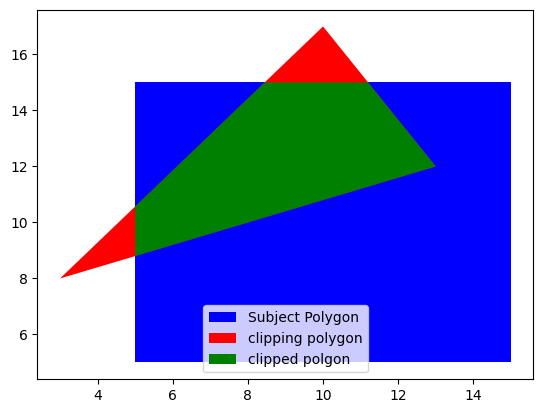

[[ 5.         10.57142857]
 [ 5.          8.8       ]
 [13.         12.        ]
 [11.2        15.        ]
 [ 8.44444444 15.        ]]


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import warnings

# POINTS NEED TO BE PRESENTED CLOCKWISE OR ELSE THIS WONT WORK

class PolygonClipper:
    
    def __init__(self,warn_if_empty=True):
        self.warn_if_empty = warn_if_empty
    
    def is_inside(self,p1,p2,q):
        R = (p2[0] - p1[0]) * (q[1] - p1[1]) - (p2[1] - p1[1]) * (q[0] - p1[0])
        if R <= 0:
            return True
        else:
            return False

    def compute_intersection(self,p1,p2,p3,p4):
        # if first line is vertical
        if p2[0] - p1[0] == 0:
            x = p1[0]
            
            # slope and intercept of second line
            m2 = (p4[1] - p3[1]) / (p4[0] - p3[0])
            b2 = p3[1] - m2 * p3[0]
            
            # y-coordinate of intersection
            y = m2 * x + b2
        
        # if second line is vertical
        elif p4[0] - p3[0] == 0:
            x = p3[0]
            
            # slope and intercept of first line
            m1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
            b1 = p1[1] - m1 * p1[0]
            
            # y-coordinate of intersection
            y = m1 * x + b1
        
        # if neither line is vertical
        else:
            m1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
            b1 = p1[1] - m1 * p1[0]
            
            # slope and intercept of second line
            m2 = (p4[1] - p3[1]) / (p4[0] - p3[0])
            b2 = p3[1] - m2 * p3[0]
        
            # x-coordinate of intersection
            x = (b2 - b1) / (m1 - m2)
        
            # y-coordinate of intersection
            y = m1 * x + b1
        
        intersection = (x,y)
        
        return intersection
    
    def clip(self,subject_polygon,clipping_polygon):
        
        final_polygon = subject_polygon.copy()
        
        for i in range(len(clipping_polygon)):
            
            # stores the vertices of the next iteration of the clipping procedure
            next_polygon = final_polygon.copy()
            
            # stores the vertices of the final clipped polygon
            final_polygon = []
            
            # these two vertices define a line segment (edge) in the clipping
            # polygon. It is assumed that indices wrap around, such that if
            # i = 1, then i - 1 = K.
            c_edge_start = clipping_polygon[i - 1]
            c_edge_end = clipping_polygon[i]
            
            for j in range(len(next_polygon)):
                
                # these two vertices define a line segment (edge) in the subject
                # polygon
                s_edge_start = next_polygon[j - 1]
                s_edge_end = next_polygon[j]
                
                if self.is_inside(c_edge_start,c_edge_end,s_edge_end):
                    if not self.is_inside(c_edge_start,c_edge_end,s_edge_start):
                        intersection = self.compute_intersection(s_edge_start,s_edge_end,c_edge_start,c_edge_end)
                        final_polygon.append(intersection)
                    final_polygon.append(tuple(s_edge_end))
                elif self.is_inside(c_edge_start,c_edge_end,s_edge_start):
                    intersection = self.compute_intersection(s_edge_start,s_edge_end,c_edge_start,c_edge_end)
                    final_polygon.append(intersection)
        
        return np.asarray(final_polygon)
    
    def __call__(self,A,B):
        clipped_polygon = self.clip(A,B)
        if len(clipped_polygon) == 0 and self.warn_if_empty:
            warnings.warn("No intersections found. Are you sure your \
                          polygon coordinates are in clockwise order?")
        
        return clipped_polygon
    
if __name__ == '__main__':
    
    # some test polygons
    
    clip = PolygonClipper()
    
#     subject_polygon = [(0,3),(0.5,0.5),(3,0),(0.5,-0.5),(0,-3),(-0.5,-0.5),(-3,0),(-0.5,0.5)]
#     clipping_polygon = [(-2,-2),(-2,2),(2,2),(2,-2)]
    subject_polygon = [(5,5),(15,5),(15,15),(5,15)]
    clipping_polygon = [(10,17),(13,12),(3,8)]
    
    # star and triangle
    # subject_polygon = [(0,3),(0.5,0.5),(3,0),(0.5,-0.5),(0,-3),(-0.5,-0.5),(-3,0),(-0.5,0.5)]
    # clipping_polygon = [(0,2),(2,-2),(-2,-2)]
    
    subject_polygon = np.array(subject_polygon)
    clipping_polygon = np.array(clipping_polygon)
    clipped_polygon = clip(subject_polygon,clipping_polygon)
    fig, ax = plt.subplots()
    xs, ys = zip(*subject_polygon)# create lists of x and y values
    plt.fill(xs, ys, 'b',label='Subject Polygon')
    
    xs, ys = zip(*clipping_polygon)# create lists of x and y values
    plt.fill(xs, ys, 'r',label='clipping polygon')
    
    xs, ys = zip(*clipped_polygon) # create lists of x and y values
    plt.fill(xs, ys, 'g',label='clipped polgon')
    plt.legend() 
    plt.show()
    print(clipped_polygon)